# First Baseman Descriptive Analysis
## June 2023

Goals: 
- Identify the plays where a ball is thrown to first base
- Identify the plays when a 1st baseman catches the ball
- Make heatmaps of all of those


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [3]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [18]:
bf = Baseball_Field(which_game="1903_01_TeamNE_TeamA2")

In [40]:
game_events_df = bf.game_obj.game_events_df.copy()

In [42]:
first_base_acq = game_events_df.loc[(game_events_df["event_code"] == 2) & (game_events_df["player_position"] == 3), :]

In [46]:
# there are 26!

first_base_acq.timestamp

23        141266
36        181361
67        462225
120       883305
132       988806
151      1095198
182      1376457
217      1619239
330      2708075
390      3282374
408      3441105
411      3461466
444      3640161
456      3796416
485      3914820
543      4575844
590      4907329
676      5750711
711      5978807
719      6121961
859      7275642
891      7472455
908      7713388
1018     8669663
1141     9881622
1257    10933696
Name: timestamp, dtype: int64

In [47]:
player_pos_df = bf.game_obj.new_player_pos.copy()

In [52]:
# wow this lines up exactly here!
# in general, I don't expect it to?

first_base_acq_pos = player_pos_df.loc[(player_pos_df["timestamp"].isin(first_base_acq.timestamp)) & (player_pos_df["player_position"] == 3)]

In [13]:
x = np.random.normal(size=1000) * 100 - 50

In [31]:
y = x * 3 + np.random.normal(size=1000) * 100 + 100

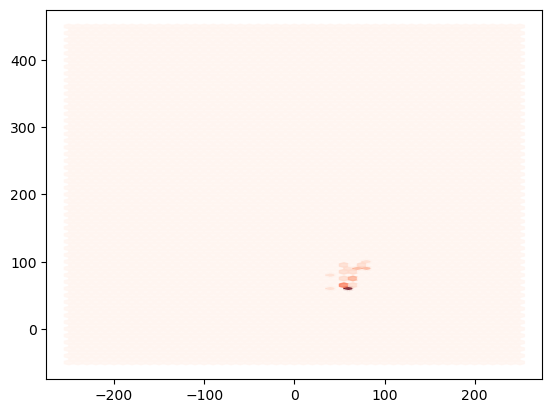

In [71]:
fig, ax = plt.subplots()

ax.hexbin(first_base_acq_pos["field_x"], 
          first_base_acq_pos["field_y"], 
          gridsize=(50, 50), 
          extent = (-250, 250, -50, 450),
          
          cmap=plt.cm.Reds, alpha = 0.8)

#ax.set_ylims(1)
fig

In [73]:
plt.close()

In [25]:
new_fig = bf.fig


bf.plot_all_components(play_id = 10)


# ugh matplotlib figures are pass by reference

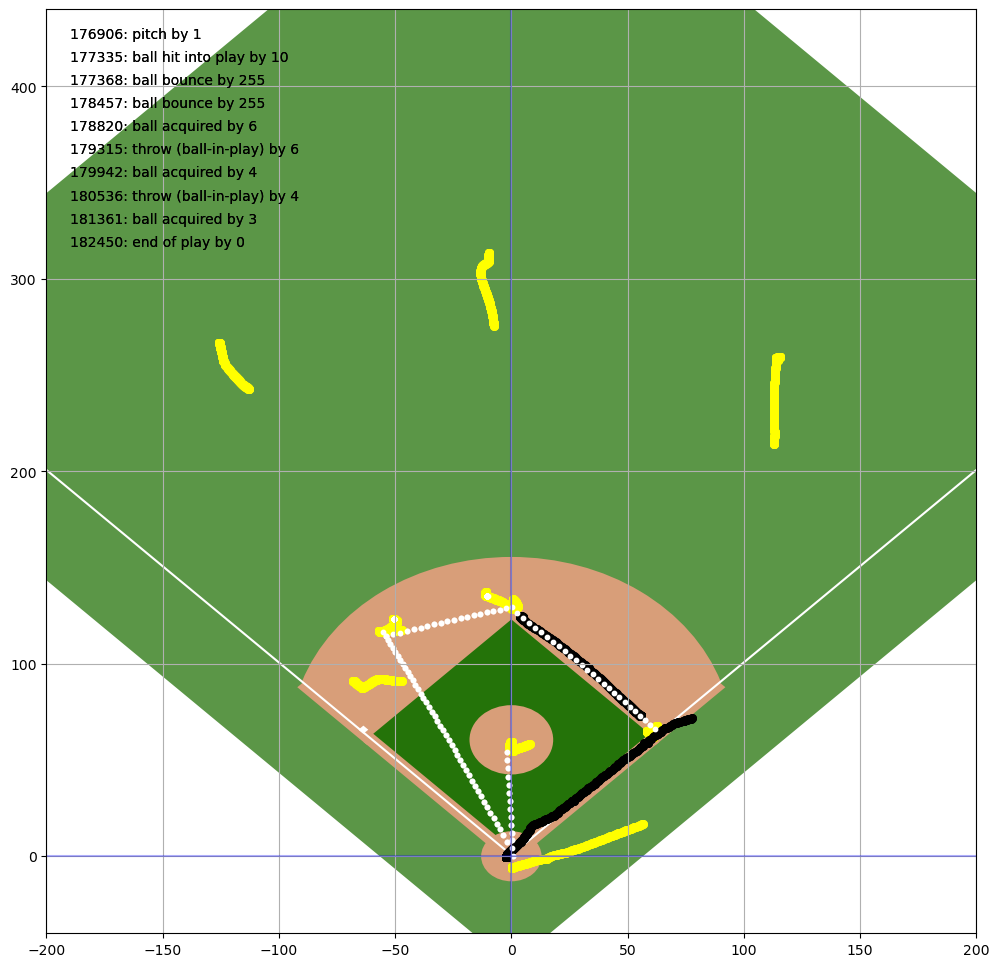

In [74]:
new_fig